# Exploring Confirmed Planets

Now that you have an understanding of stellar light curves and what we can learn from them, let’s explore some archived Kepler data for confirmed planets. To start, visit [this following link](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS). 

This will bring you to the search page for the database of confirmed planets. We are going to set some parameters in order to limit our search to large, short period planets with deep transit depths (which, as you discovered earlier, are the easiest planets to detect with this method). In order to do so, take the following steps: 

1. In the column titled "Planet Radius [Jupiter radii]", type in  > 0.8. Note that this is in units of Jupiter radii. This value will ensure that the depth of our transit signal is deep and easy to detect.
2. In the column titled "Orbital Period [days]", let's make it less than 20, say. For this, you have to type < 20. This will make it more likely that you'll see multiple transits during your observation.
3. Let's just look at planets that have been observed by Kepler, so in the "Host Name" column, write "kepler". This way, we can go and readily look at the Kepler light curves which have all been made public.
4. As an example, let's choose Kepler 435. To find it easily, click on the down arrow button in the "Planet Radius" column to sort by decreasing radii. (You'll later choose your own planet to present on, so make sure to refer back to these instructions.)
5. Clicking on the name will bring you to a page with more detailed information on your planet. Among this information, you'll find  estimates quoted from the literature for various parameters, and even some images in the top right of what that region of sky looks like in different wavebands (you may want to include these images in your presentation for whichever planet you choose). 
6. Note at the top of the page, under the heading "Object and Aliases", there will be some information on what name that system is cross-listed as in a few different telescopes and catalogs. (Write down these names!) Find the number that follows the letters "KIC". In our case, this is "KIC 7529266  b". Copy this number, and paste it into the "Kepler ID" field in [this following link](https://exoplanetarchive.ipac.caltech.edu/), and hit enter. 
    * Important: when picking a planet on your own, if it does not have a KIC ID number listed in "Object and Aliases", go back and choose a different planet until you find one that does.
7. Choose, say, the last row in the table that comes up, and click on the "DV Time Series" link. This will take you to a page where it plots for you a light curve of your star, and the observed transiting planet signature. You can zoom in on the light curve by clicking and dragging to form a rectangle that encompasses the data you want to zoom in on, or by clicking the magnifying glass at the bottom.
8. By default, it will plot for you in the x-axis column "TIME", and in the y-axis column it plots "LC_INIT". In other words, you are seeing time on the x-axis and on the y-axis you are seeing the initial, *raw* light curve. Play around with the other possible columns for your x and y inputs.
    * For example, discuss what "LC_DETREND" means, and why it looks better than "LC_INIT". 
    * Try plotting "PHASE [days]" on the x-axis. What does this do?
9.	Once you are happy with how it looks, download a PNG of the light curve using the second-from-the-right icon at the bottom. Note that you can save multiple snapshots like this, for instance, if you want a zoomed-in and zoomed-out view, or if you want to plot a phase graph and a time graph. 

Congratulations; you’ve just characterized a real planet!  You’ve now joined hundreds of astronomers around the world who use Kepler data to further our understanding of exoplanets. 

## Plotting on your own

If you want a bigger challenge, and/or more freedom when making your plots, do the following in lieu of step 10 above.

From the graph made for you above, once you've zoomed in to an appropriate region and plotted the desired columns, you can download the data currently in that graph window as a table, so that you can make your own more unique and sophistacated graph. You do this by clicking on the right-most icon at the bottom of your graph labeled "Download table of plotted data", right next to the "Download as PNG" button. Here, I've downloaded "MODEL_INIT" plotted against "TIME" for the first 300 or so days, as a file named "KIC_7529266.tbl"

Once this file has been downloaded and moved into my current working folder (i.e. Day 3), I can load it into Python like so:

In [1]:
from astropy.table import Table

kepler_435b_tab = Table.read("./static/KIC_7529266.tbl", format='ascii.ipac')

Now we're going to modify our `square_dip` function so that we can use the provided parameters from the Kepler catalog to model the data.

In [2]:
import numpy as np

def square_dip(times, fluxes, start_time, star_mass, star_radius, planet_radius, period):
    """
    Let's add some comments to our custom function to make sure we don't 
    forget what it does.

    Parameters
    ----------
    times : array
        The observation times of our exoplanet in days.
    fluxes : array
        The flux we anticipate seeing from the star before adding a planet.
    start_time : float
        The start time of the first transit, in days.
    star_mass : float
        The mass of the parent star, in solar masses.
    star_radius : float
        The radius of the parent star, in solar radii.
    planet_radius : float
        The radius of our exoplanet, in Jupiter radii.
    period : float
        How often the our planet transits in front of the star, in days.

    Returns
    -------
    flux : array
        The values of the normalized amount of light received from the
        parent star.
    """
    # Convert our times and period from days to seconds
    times = times * 86400
    period = period * 86400
    start_time = start_time * 86400

    # Assume we're orbiting a Sun-like parent star 
    # with an 89 degree incline
    G = 6.67e-11  # Gravitational constant in the MKS system
    star_mass = star_mass * 1.989e30  # Convert from solar masses in kilograms
    star_radius = star_radius * 6.957e8  # Convert from solar radii to meters
    planet_radius = planet_radius * 7.1492000e7  # Convert from Jupiter radii to meters

    # We'll convert the inclination to radians
    i = np.deg2rad(85.51)

    # Calculate the semi-major axis of the orbit
    a = ((period ** 2 * G * star_mass) / (4 * np.pi ** 2)) ** (1/3)
    print("Semi-major axis:", a/1.496e11, "AU")

    # The impact parameter of the orbit
    b = a * np.cos(i) / star_radius
    print("Impact parameter:", b)

    # Calculate how long it takes the planet to cross the star
    transit_duration = (period / np.pi) * np.arcsin(np.sqrt((star_radius + planet_radius) ** 2 - (b * star_radius) ** 2) / a)
    print("Transit duration: ", transit_duration/86400, "days")
    
    # Now calculate the transit depth, i.e. how much light is blocked when it transits
    transit_depth = 1 - (planet_radius / star_radius) ** 2
    print("Transit Depth:", transit_depth)

    # Let's randomly choose a time for our first transit
    # first_transit = np.random.uniform(0, times[-1] * 0.2)
    
    transit_start = start_time
    transit_end = transit_start + transit_duration

    for i in range(len(times)):
        t = times[i]

        # If our time is during a transit, add the transit depth. However, if there
        # are multiple planets, only take the deepest transit depth.
        if transit_start < t < transit_end:
            fluxes[i] = min(transit_depth, fluxes[i])

        # If we've just exited the tranit, reset the
        # our variables for the next transit
        elif t >= transit_end:
            transit_start += period
            transit_end = transit_start + transit_duration

    return fluxes

Refer back to the catalog on the website. For our chosen exoplanet, we find that $t_\mathrm{start} = 134.4 \; \mathrm{days}$, $M_s = 1.538 \; \mathrm{M_\odot}$, $R_s = 3.21 \; \mathrm{R_\odot}$, $R_p = 1.99 \; \mathrm{R_Jup}$, and $P = 8.6 \; \mathrm{days}$, so:

Semi-major axis: 0.09481290326450129 AU
Impact parameter: 0.4972228879872089
Transit duration:  0.4067889013456635 days
Transit Depth: 0.9959414866891165


Text(0, 0.5, 'Normalized Flux')

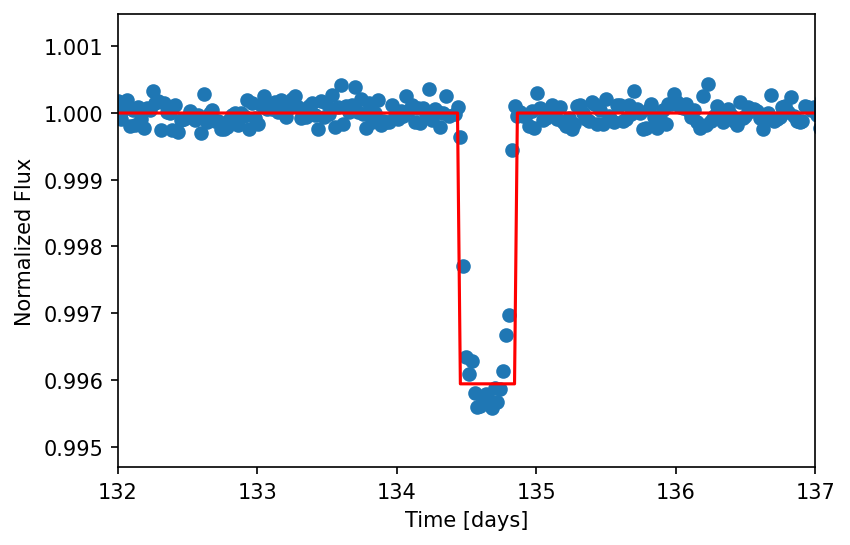

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Get the observed data from the table. Note that we add 1 to the flux decrement.
times = kepler_435b_tab['TIME']
data = kepler_435b_tab['LC_DETREND'] + 1
fluxes = np.ones(len(times))

# Now plot it!
f, ax = plt.subplots(dpi=150)

ax.scatter(times, data)
ax.plot(times, square_dip(times, fluxes, start_time=134.448, star_mass=1.538, star_radius=3.21, planet_radius=1.99, period=8.6001536), color='red')
ax.set_xlim(132, 137)
ax.set_xlabel("Time [days]")
ax.set_ylabel("Normalized Flux")

Not bad for our simple model!